# Heart Disease Prediction using Machine Learning
### Context
The World Health Organization as well as the Global Burden of Disease study reported cardiovascular disease (CVD) as the leading cause of death globally. In industrialized countries, the rate is approximately 1 in 4 deaths, while in less developed countries the rate is even higher. 
### Objective

### Dataset Information
This dataset has 918 patient entries with 12 features:  
| ***Column*** | ***Description*** |
|---------- | ----------|
| ***Age*** | Patient's age in years. |
| ***Sex*** | Patient's gender (M/F). |
| ***ChestPainType*** | Type of chest pain (TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic). |
| ***RestingBP*** | Resting blood pressure (mmHg). |
| ***Cholesterol*** | Cholesterol level (mg/dL). |
| ***FastingBS*** | Fasting blood sugar (1 if >120mg/dL, otherwise 0). |
| ***Resting ECG*** | Resting electrocardiogram results (Normal: Normal, ST: Having ST-T wave abnormality, LVH: showing probable/definite left ventricular hypertrophy). |
| ***MaxHR*** | Maximum heart rate achieved during exercise. |
| ***ExerciseAngina*** | Exercised-induced angina (Y/N). |
| ***Oldpeak*** | ST depression induced by exercise relative to rest. |
| ***ST_Slope*** | ST segment slope during stress test (Up, Flat, Down). |
| ***HeartDisease*** | Target variable (1=heart disease, 0=no heart disease). |
### Source

In [27]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

import statsmodels.api as sm
from scipy import stats

In [28]:
heart_df = pd.read_csv('heart.csv')
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [29]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [30]:
heart_df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [31]:
heart_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [32]:
restbp_zero = heart_df[heart_df['RestingBP'] == 0]
print(f"Number of entries with missing resting bp: {len(restbp_zero)}")
print(restbp_zero.head())

Number of entries with missing resting bp: 1
     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
449   55   M           NAP          0            0          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
449    155              N      1.5     Flat             1  


In [33]:
chol_zero = heart_df[heart_df['Cholesterol'] == 0]
print(f"Number of entries with missing cholesterol: {len(chol_zero)}")
print(chol_zero.head(10))

Number of entries with missing cholesterol: 172
     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
293   65   M           ASY        115            0          0     Normal   
294   32   M            TA         95            0          1     Normal   
295   61   M           ASY        105            0          1     Normal   
296   50   M           ASY        145            0          1     Normal   
297   57   M           ASY        110            0          1         ST   
298   51   M           ASY        110            0          1     Normal   
299   47   M           ASY        110            0          1         ST   
300   60   M           ASY        160            0          1     Normal   
301   55   M           ATA        140            0          0         ST   
302   53   M           ASY        125            0          1     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
293     93              Y      0.0     Flat            

In [34]:
# Create copy of the dataset
heart_clean = heart_df.copy()

# Remove entry with missing resting bp
heart_clean = heart_clean[heart_clean['RestingBP'] != 0]

# Create a mask for entries with heart disease
heart_disease_mask = heart_clean['HeartDisease'] == 1

# Retrieve cholesterol values for patients with and without heart disease
chol_w_hd = heart_clean.loc[heart_disease_mask, 'Cholesterol']
chol_wo_hd = heart_clean.loc[~heart_disease_mask, 'Cholesterol']

# Replace missing cholesterol values with median cholesterol value
heart_clean.loc[heart_disease_mask, 'Cholesterol'] = chol_w_hd.replace(0, chol_w_hd.median())
heart_clean.loc[~heart_disease_mask, 'Cholesterol'] = chol_wo_hd.replace(0, chol_wo_hd.median())

print(heart_clean['Cholesterol'].describe())

count    917.000000
mean     239.700109
std       54.352727
min       85.000000
25%      214.000000
50%      225.000000
75%      267.000000
max      603.000000
Name: Cholesterol, dtype: float64


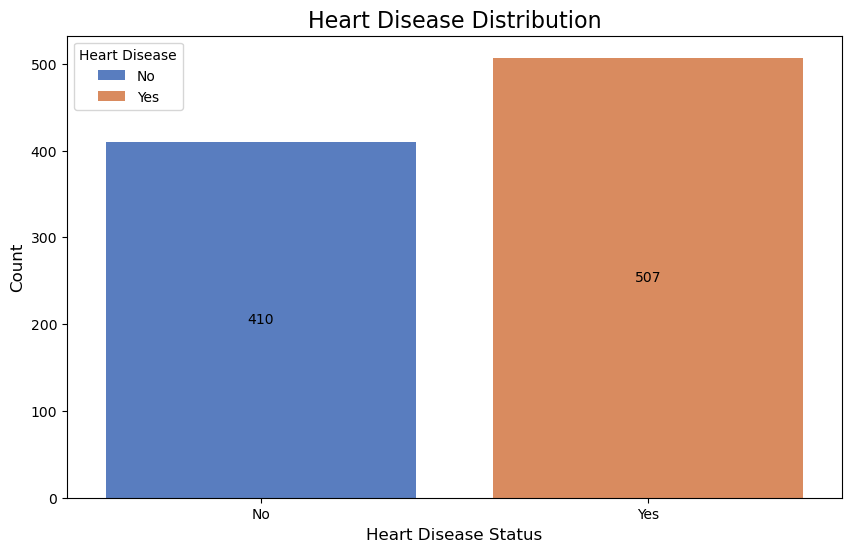

In [35]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=heart_clean, x='HeartDisease', hue='HeartDisease', palette='muted')
plt.title('Heart Disease Distribution', fontsize=16)
plt.xlabel('Heart Disease Status', fontsize=12)
plt.xticks([0,1], ['No','Yes'])
plt.ylabel('Count', fontsize=12)
plt.legend(title='Heart Disease', labels=['No','Yes'])
for container in ax.containers:
    ax.bar_label(container, label_type='center')
plt.show()

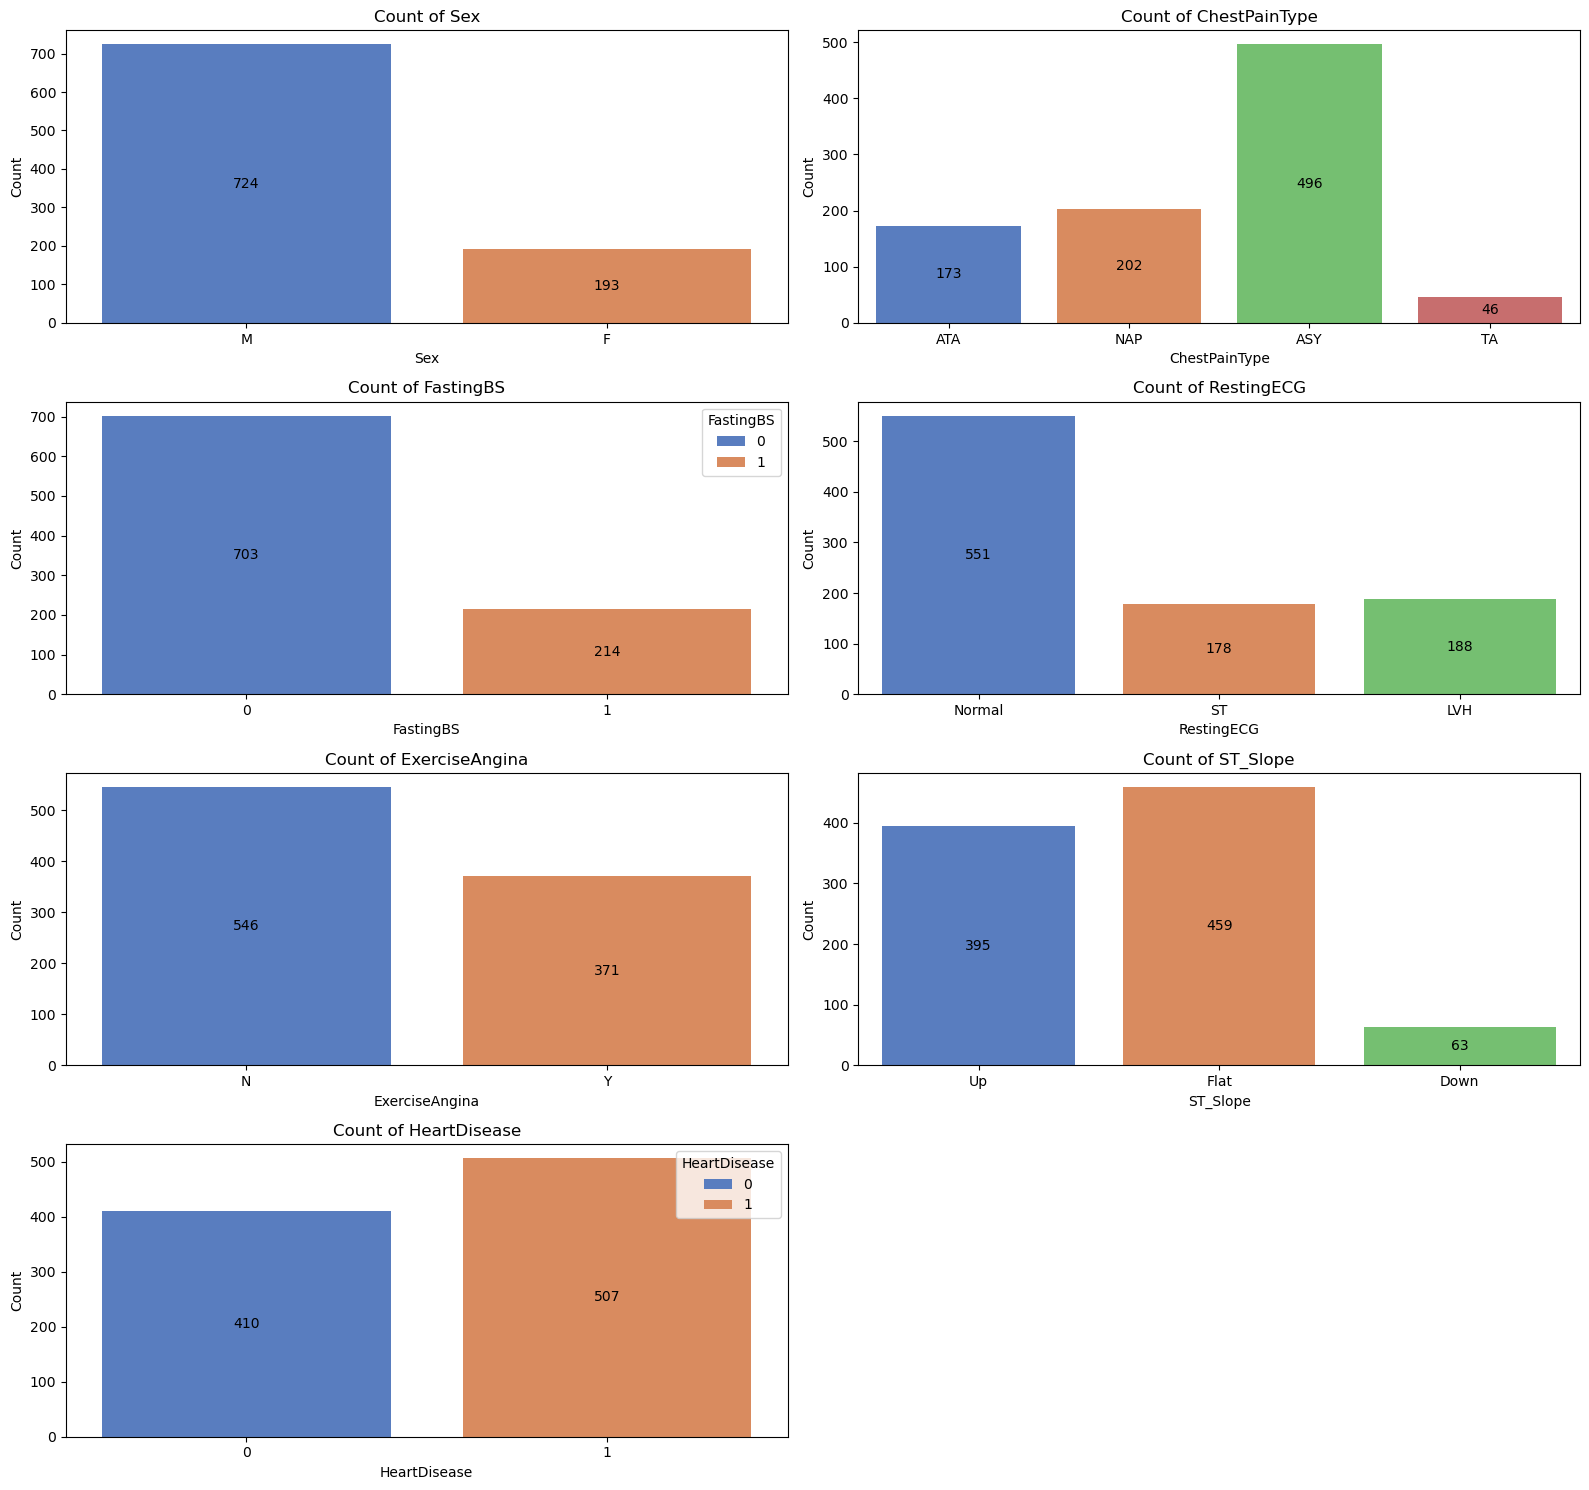

In [36]:
categorical_features = ['Sex', 'ChestPainType','FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']

fig = plt.figure(figsize=(16,15))
for i, col in enumerate(categorical_features, 1):
    ax = fig.add_subplot(4,2,i)
    sns.countplot(x=heart_clean[col], hue=heart_clean[col], palette='muted', ax=ax)
    for container in ax.containers:
        ax.bar_label(container, label_type='center')
    ax.set_title(f"Count of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

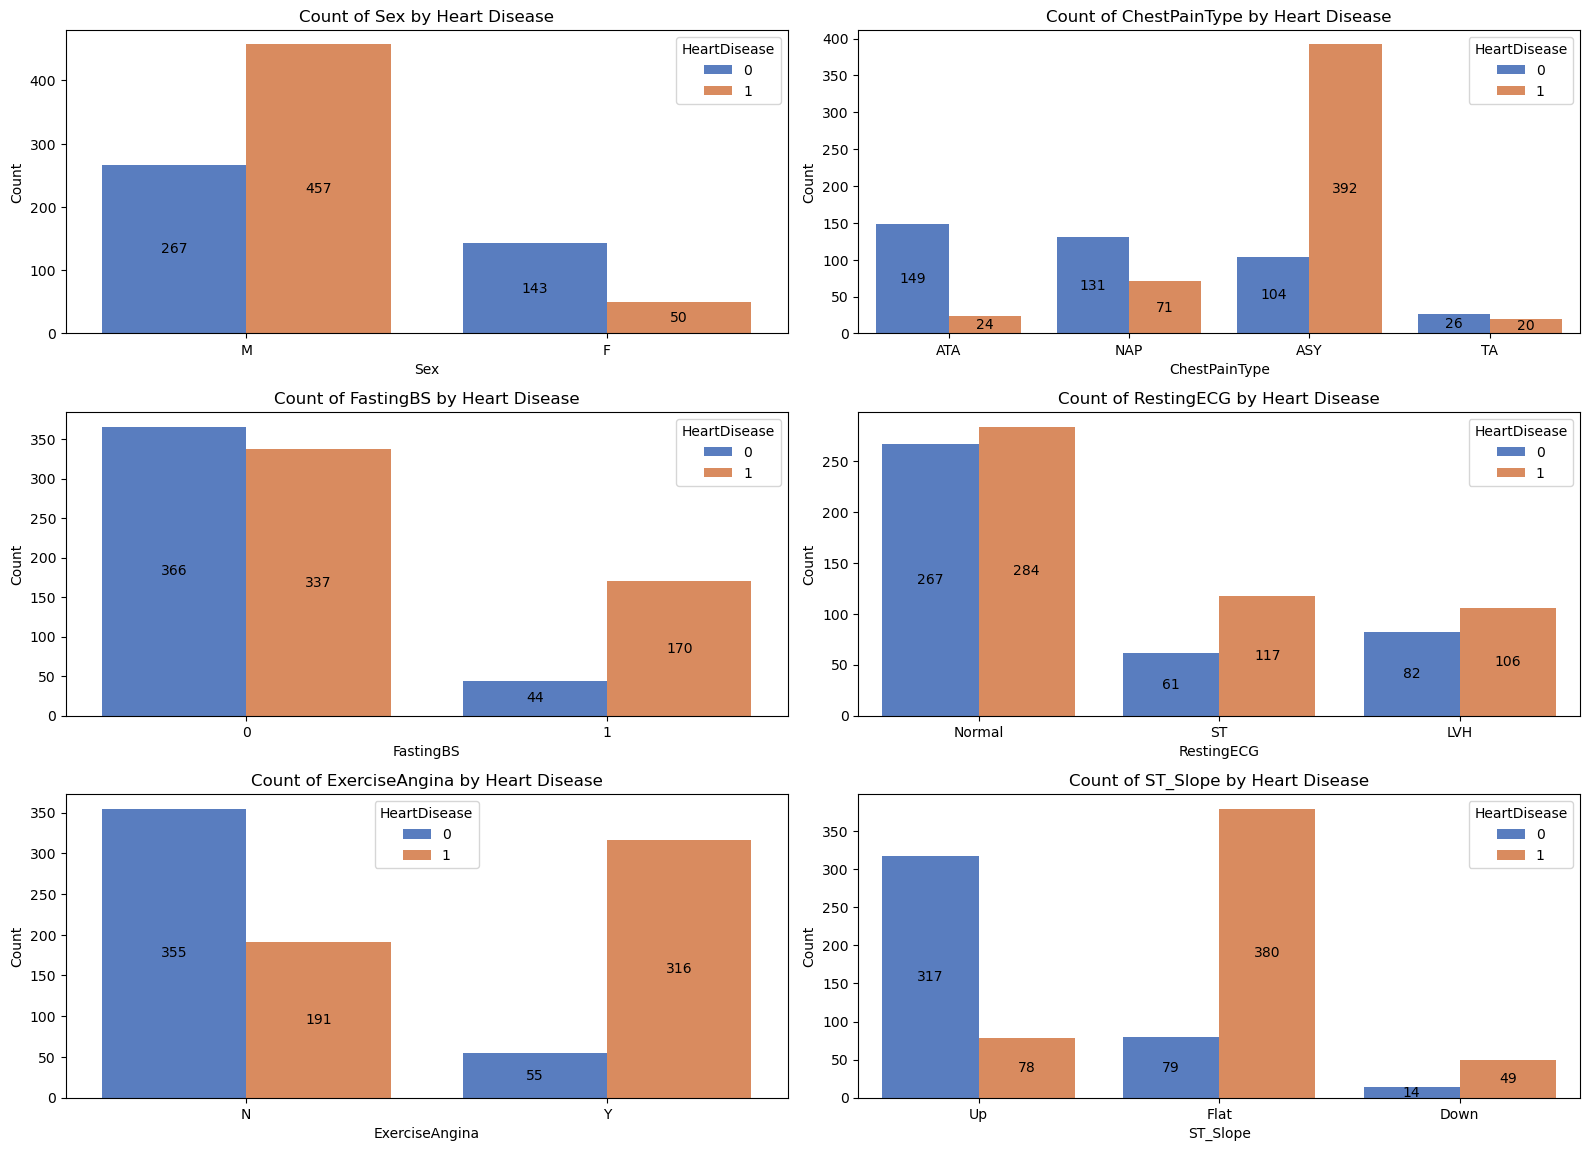

In [37]:
fig = plt.figure(figsize=(16,15))
for i, col in enumerate(categorical_features[:-1]):
    ax = fig.add_subplot(4,2,i+1)
    sns.countplot(data=heart_clean, x=col, hue='HeartDisease', palette='muted', ax=ax)
    for container in ax.containers:
        ax.bar_label(container, label_type='center')
    ax.set_title(f"Count of {col} by Heart Disease")
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

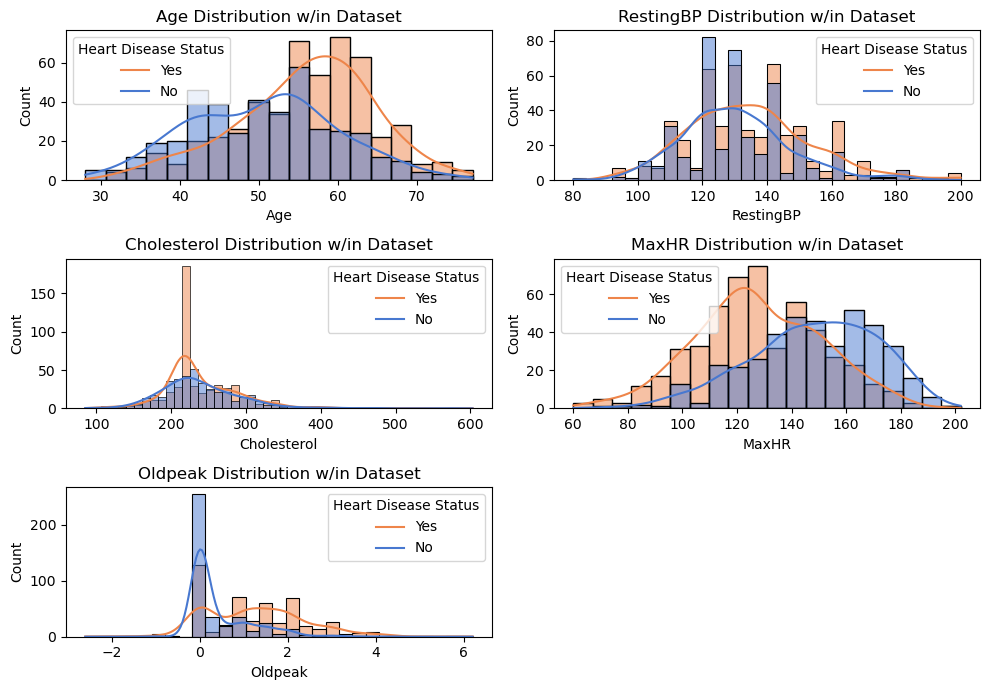

In [52]:
cols = heart_clean[['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']].columns
fig, axes = plt.subplots(3, 2, figsize=(10,7))
axes = axes.flatten()

for ax, col in zip(axes, cols):
    sns.histplot(data=heart_clean, x=col, kde=True, hue='HeartDisease', palette='muted', ax=ax)
    ax.set_title(f"{col} Distribution w/in Dataset")
    ax.legend(title='Heart Disease Status', labels=['Yes','No'])
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

for ax in axes[len(cols):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

<Figure size 800x800 with 0 Axes>

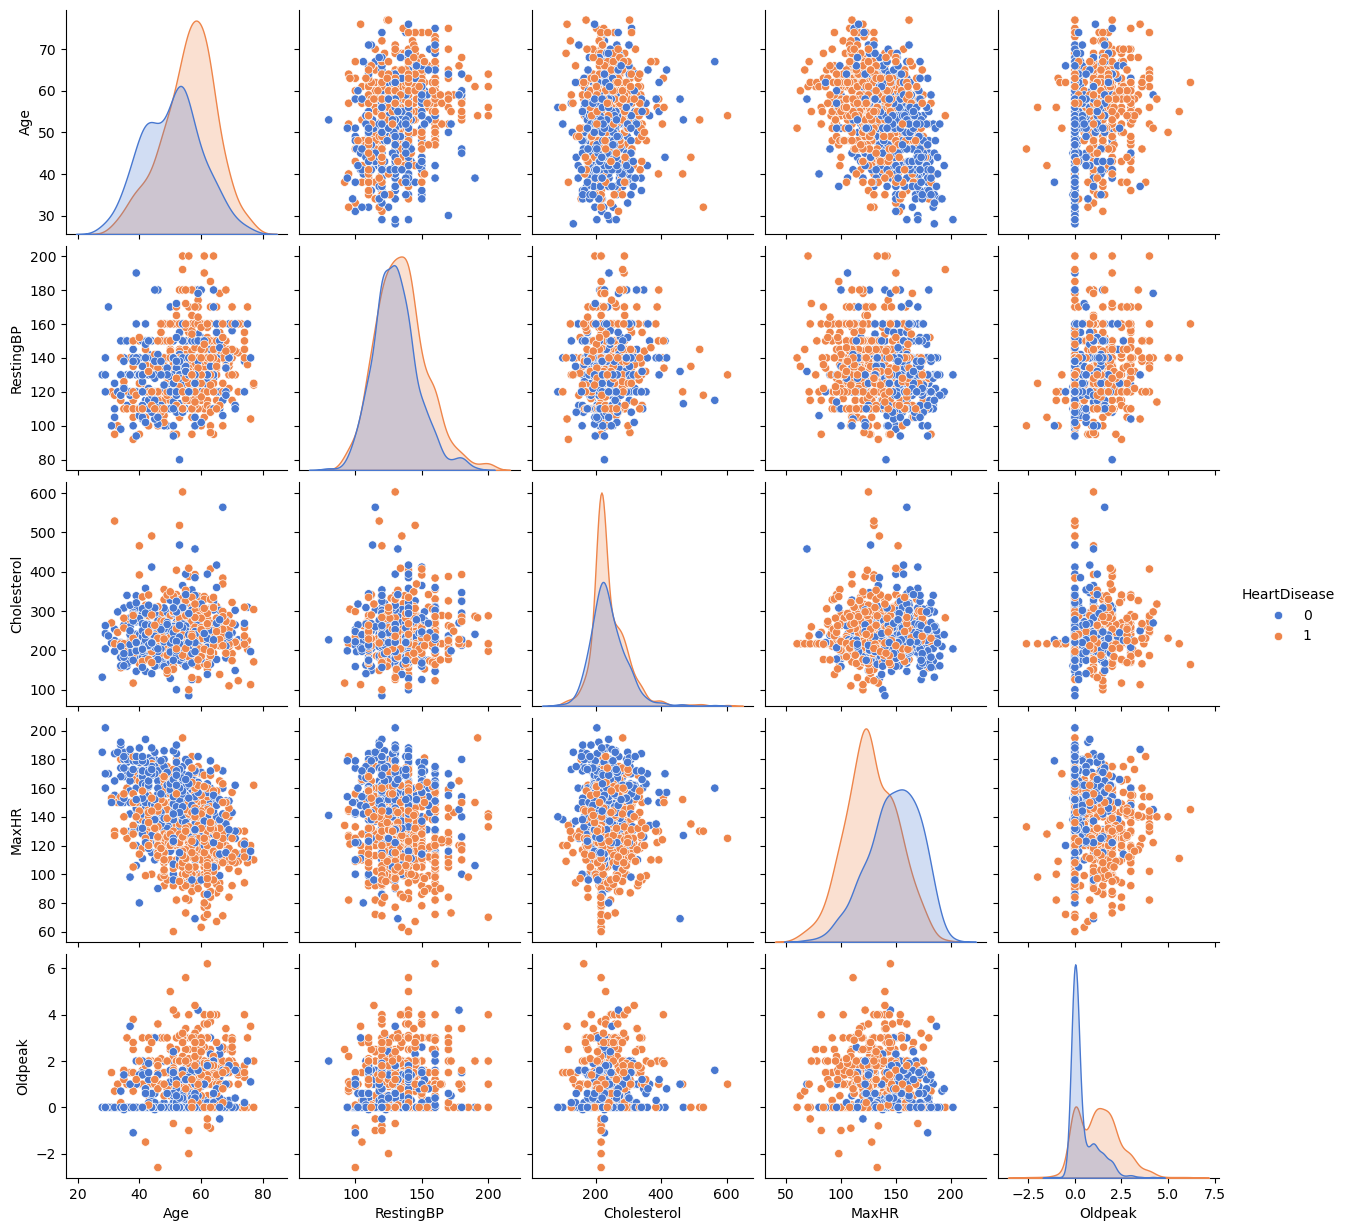

In [53]:
numerical_features = heart_clean[['Age','RestingBP','Cholesterol','MaxHR','Oldpeak', 'HeartDisease']]
plt.figure(figsize=(8,8))
sns.pairplot(numerical_features, hue='HeartDisease', palette='muted')
plt.show()

In [40]:
# One-hot encode categorical features
heart_clean = pd.get_dummies(heart_clean, drop_first=True)
heart_clean.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True


In [41]:
heart_clean['HeartDisease'] = LabelEncoder().fit_transform(heart_clean['HeartDisease'])
X = heart_clean.drop(['HeartDisease'], axis=1)  # X = input values
y = heart_clean['HeartDisease'] # y = target values

In [42]:
# Build multi-feature classifier
# Model will be trained on 70% of the data and tested on 30% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

# Scale the features to the same range
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
# Determine what classification algorithms perform most accurate predictions on given training data.
models = {
    "Logistic Regression": LogisticRegression(max_iter=5000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "Support Vector Machine": SVC(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=10)
}

accuracies = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    accuracies[name] = accuracy_score(y_test, preds)

print("ML Model Accuracy (%):")
for name, acc in accuracies.items():
    print(f"{name}: {acc*100:.2f}%")

ML Model Accuracy (%):
Logistic Regression: 87.32%
Decision Tree: 79.35%
Random Forest: 87.32%
Naive Bayes: 86.23%
Support Vector Machine: 85.14%
K-Nearest Neighbors: 82.97%


In [44]:
# Perform 8-fold cross validation for each model
cv_accuracies = {}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=8, scoring='accuracy')
    cv_accuracies[name] = (scores.mean(), scores.std())

print("Cross-Validated Accuracy (%):")
for name, (mean_acc, std_acc) in cv_accuracies.items():
    print(f"{name}: {mean_acc*100:.2f}% (+/- {std_acc*100:.2f}%)")

Cross-Validated Accuracy (%):
Logistic Regression: 84.94% (+/- 4.94%)
Decision Tree: 75.11% (+/- 8.22%)
Random Forest: 85.37% (+/- 6.72%)
Naive Bayes: 84.61% (+/- 4.67%)
Support Vector Machine: 67.85% (+/- 5.93%)
K-Nearest Neighbors: 66.84% (+/- 3.83%)


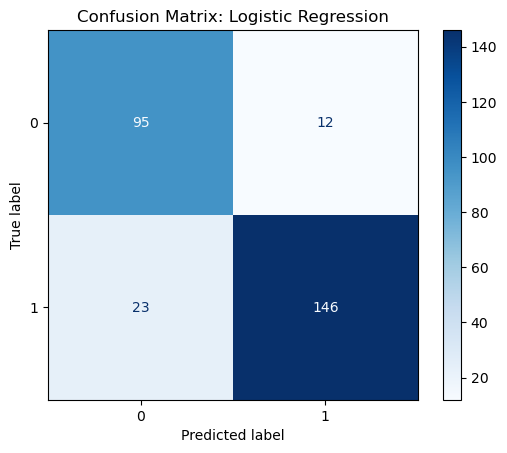

Logistic Regression:
  Sensitivity (Recall for Heart Disease): 86.39%
  Specificity (Recall for No Heart Disease): 88.79%



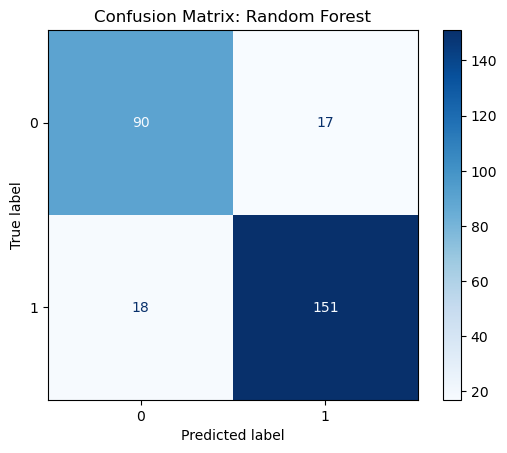

Random Forest:
  Sensitivity (Recall for Heart Disease): 89.35%
  Specificity (Recall for No Heart Disease): 84.11%



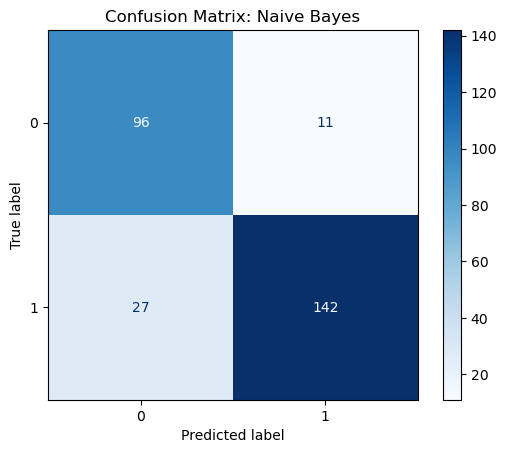

Naive Bayes:
  Sensitivity (Recall for Heart Disease): 84.02%
  Specificity (Recall for No Heart Disease): 89.72%



In [45]:
# Evaluate top 3 models: Logistic Regression, Random Forest, Naive Bayes
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

top_models = {
    "Logistic Regression": LogisticRegression(max_iter=5000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Naive Bayes": GaussianNB()
}

for name, model in top_models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix: {name}")
    plt.show()

    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (cm[0,0], cm[0,1], cm[1,0], cm[1,1])
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    print(f"{name}:")
    print(f"  Sensitivity (Recall for Heart Disease): {sensitivity*100:.2f}%")
    print(f"  Specificity (Recall for No Heart Disease): {specificity*100:.2f}%\n")

In [54]:
# Logistic Regression Feature Importance
feature_names = X.columns.tolist()
log_reg = LogisticRegression(max_iter=5000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

coef_df = pd.DataFrame({
    'Features': feature_names,
    'Coefficients': log_reg.coef_[0],
    'Abs_Coefficients': np.abs(log_reg.coef_[0])
}).sort_values(by='Abs_Coefficients', ascending=False)

print(coef_df.head(10))

             Features  Coefficients  Abs_Coefficients
5             Oldpeak      1.643153          1.643153
7   ChestPainType_ATA     -1.553193          1.553193
14        ST_Slope_Up     -1.533666          1.533666
8   ChestPainType_NAP     -1.402867          1.402867
6               Sex_M      1.327851          1.327851
9    ChestPainType_TA     -1.051885          1.051885
3           FastingBS      1.037741          1.037741
12   ExerciseAngina_Y      0.909711          0.909711
13      ST_Slope_Flat      0.863596          0.863596
4               MaxHR     -0.578621          0.578621


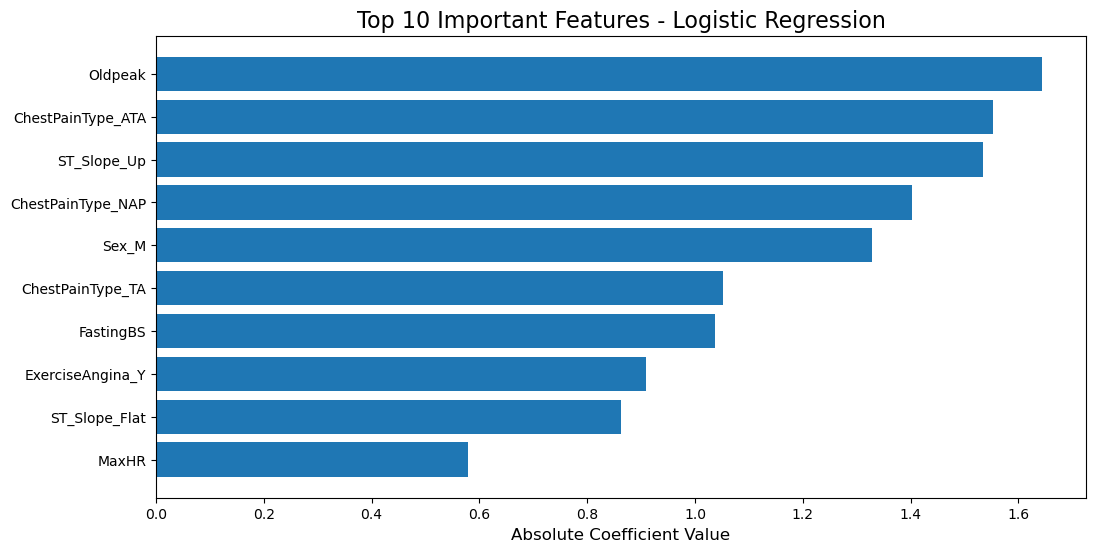

In [55]:
# Plot Logistic Regression Coefficients
plt.figure(figsize=(12, 6))
plt.barh(coef_df['Features'].head(10), coef_df['Abs_Coefficients'].head(10))
plt.title('Top 10 Important Features - Logistic Regression', fontsize=16)
plt.xlabel('Absolute Coefficient Value', fontsize=12)
plt.gca().invert_yaxis()
plt.show()


In [48]:
# Using statsmodels for comprehensive statistical output
X_train_scaled_sm = sm.add_constant(X_train_scaled)  # Add intercept
logit_model = sm.Logit(y_train, X_train_scaled_sm)
logit_result = logit_model.fit()

# Extract coefficients, standard errors, and p-values
coefficients = logit_result.params[1:]  # Exclude intercept
std_errors = logit_result.bse[1:]       # Exclude intercept
p_values = logit_result.pvalues[1:]     # Exclude intercept
conf_int = logit_result.conf_int()[1:]  # Exclude intercept

# Calculate odds ratios
odds_ratios = np.exp(coefficients)
or_conf_int = np.exp(conf_int)



Optimization terminated successfully.
         Current function value: 0.336797
         Iterations 7


In [50]:
# Create comprehensive DataFrame
coef_df2 = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Std_Error': std_errors,
    'P_Value': p_values,
    'Odds_Ratio': odds_ratios,
    'OR_Lower_CI': or_conf_int.iloc[:, 0],
    'OR_Upper_CI': or_conf_int.iloc[:, 1],
    'Abs_Coefficient': np.abs(coefficients),
    'Significant': p_values < 0.05
}).sort_values('Abs_Coefficient', ascending=False)

print(coef_df2.head(10))

               Feature  Coefficient  Std_Error       P_Value  Odds_Ratio  \
x6             Oldpeak     3.513405   1.178096  2.861164e-03   33.562344   
x8   ChestPainType_ATA    -1.791592   0.394383  5.551777e-06    0.166695   
x9   ChestPainType_NAP    -1.653212   0.310163  9.813844e-08    0.191434   
x7               Sex_M     1.535607   0.331805  3.691423e-06    4.644144   
x10   ChestPainType_TA    -1.529612   0.543712  4.903941e-03    0.216620   
x15        ST_Slope_Up    -1.429657   0.532281  7.233307e-03    0.239391   
x4           FastingBS     1.176493   0.317336  2.093965e-04    3.242982   
x14      ST_Slope_Flat     1.032281   0.500169  3.903039e-02    2.807463   
x13   ExerciseAngina_Y     0.803557   0.284149  4.684870e-03    2.233472   
x3         Cholesterol    -0.784101   1.326507  5.544519e-01    0.456530   

     OR_Lower_CI  OR_Upper_CI  Abs_Coefficient  Significant  
x6      3.334687   337.792125         3.513405         True  
x8      0.076952     0.361094         1